In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) 
from sklearn import preprocessing
import datetime as dt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pickle

### Read in the modelling file created in the Data Preparation notebook --> modelling_data.csv

In [2]:
data = pd.read_csv('modelling_data.csv', sep=',')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,year,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,dep_h,arr_h,crs_elapsed_time,distance,arr_delay,mean_delay_carrier,mean_delay_origin,mean_delay_dest,mean_delay_month,mean_delay_dep_h,mean_delay_arr_h,mean_delay_day_of_week,mean_delay_route,mean_taxi_out_per_dep_h,mean_taxi_in_per_arr_h,num_flights_per_dep_h
0,2018,6,18,0,3,2653,294,21,7,8,86.0,356.0,3.0,-1.501244,1.848085,-0.732893,4.064655,-1.898582,-2.389031,1.980472,1.563380,18.512856,9.050598,6419
1,2019,11,30,5,3,5211,240,86,10,11,58.0,175.0,29.0,-1.501244,-1.461114,2.321429,0.730605,0.371673,-0.804787,-0.405668,13.333333,18.665494,7.416681,5973
2,2018,10,23,1,0,4715,301,73,18,20,125.0,573.0,1.0,2.575061,-0.427136,-0.026495,1.223602,5.422463,4.740441,1.115516,-6.666667,18.517988,8.254826,5449
3,2019,4,29,0,0,2807,226,348,13,14,63.0,204.0,30.0,2.575061,3.609845,1.514371,1.021777,2.347908,1.266858,1.980472,8.820513,16.893937,7.653950,5329
4,2018,7,17,1,8,5698,254,310,19,21,51.0,84.0,44.0,1.799225,5.158817,-0.600000,2.678597,4.243790,4.449983,1.115516,9.666667,17.393297,7.977602,5193


In [3]:
data.columns

Index(['year', 'month', 'day', 'dayofweek', 'mkt_unique_carrier',
       'mkt_carrier_fl_num', 'origin', 'dest', 'dep_h', 'arr_h',
       'crs_elapsed_time', 'distance', 'arr_delay', 'mean_delay_carrier',
       'mean_delay_origin', 'mean_delay_dest', 'mean_delay_month',
       'mean_delay_dep_h', 'mean_delay_arr_h', 'mean_delay_day_of_week',
       'mean_delay_route', 'mean_taxi_out_per_dep_h', 'mean_taxi_in_per_arr_h',
       'num_flights_per_dep_h'],
      dtype='object')

In [4]:
#re-run the models using only important features from the Random Forest Regressor
#data_imp_features = data[['mean_delay_route', 'mean_delay_dep_h', 'mean_delay_arr_h', 'mkt_carrier_fl_num', 'arr_delay']]

### Scale data and do Train-Test split

In [5]:
scaler = preprocessing.StandardScaler()

In [6]:
#X = data_imp_features.drop(columns='arr_delay').values
X = data.drop(columns='arr_delay').values

In [7]:
y = data['arr_delay'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [9]:
# Standardize the data using only statistics from the training set
# (always assume no knowledge of the test set for most unbiased performance estimate)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(66957, 23)

# Run different models on the dataset

### Linear Regression

In [10]:
reg = LinearRegression()
k_folds = 5

# Cross-validation
cv_r2 = cross_val_score(reg, X_train, y_train, cv=k_folds, scoring='r2')

# Train model on the entire training set
reg.fit(X_train, y_train)

# Test the model
y_pred_linreg = reg.predict(X_test)

# Calculate metrics
r2_linreg = r2_score(y_test, y_pred_linreg)
rmse_linreg = mean_squared_error(y_test, y_pred_linreg, squared=False)
MAE = mean_absolute_error(y_test, y_pred_linreg)

# Compare traing to test accuracy
linreg_training_accuracy = reg.score(X_train, y_train)
linreg_test_accuracy = reg.score(X_test, y_test)

# Print results
print('Linear Regression')
print('==================')
print(f'Cross-validated R^2\nMean: {cv_r2.mean():.4f}\nStd.: {cv_r2.std():.4f}')
print(f'R^2: {r2_linreg:.4f}')
print(f'RMSE: {rmse_linreg:.4f}')
print(f'MAE: {MAE:.4f}')
print(f'Training accuracy: {linreg_training_accuracy:.4f}')
print(f'Test accuracy: {linreg_test_accuracy:.4f}')

Linear Regression
Cross-validated R^2
Mean: 0.1050
Std.: 0.0040
R^2: 0.1026
RMSE: 19.3516
MAE: 15.0416
Training accuracy: 0.1057
Test accuracy: 0.1026


In [11]:
# save linear regression model
filename = 'linreg.sav'
pickle.dump(reg, open(filename, 'wb'))

In [12]:
# check correlations to different features
from scipy.stats import pearsonr

pearsonr(X_train[:,-4],y_train)

(0.2877355110929106, 0.0)

/Users/pavneetbajwa/opt/anaconda3/envs/labs/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'y_pred_linreg')

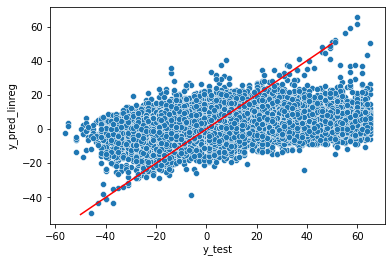

In [13]:
x_lim=[-50, 50]
y_lim=[-50, 50]
sns.scatterplot(x=y_test, y=y_pred_linreg)
sns.lineplot(x_lim, y_lim, color='red')
plt.xlabel('y_test')
plt.ylabel('y_pred_linreg')

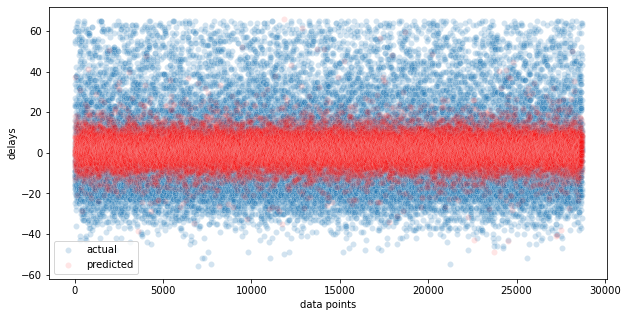

In [14]:
#x_lim=[-50, 50]
#y_lim=[-50, 50]
plt.subplots(figsize=(10,5))
x_values = np.arange(len(y_pred_linreg))
sns.scatterplot(x=x_values, y=y_test, label='actual', alpha=0.2)
sns.scatterplot(x=x_values, y=y_pred_linreg, color='red', label='predicted', alpha=0.1)
plt.xlabel('data points')
plt.ylabel('delays')
plt.legend()
plt.show()

### Polynomial Regression

#### Degree = 2

In [15]:
polyreg = LinearRegression()

# Create polynomial feature set and train model
Xpoly_train = PolynomialFeatures(degree=2).fit_transform(X_train)
Xpoly_test = PolynomialFeatures(degree=2).fit_transform(X_test)

# Train and test the model
polyreg.fit(Xpoly_train, y_train)
ypoly_train_pred = polyreg.predict(Xpoly_train)
ypoly_test_pred = polyreg.predict(Xpoly_test)

# Calculate metrics
r2_polyreg = r2_score(y_test, ypoly_test_pred)
rmse_polyreg = mean_squared_error(y_test, ypoly_test_pred, squared=False)
MAE = mean_absolute_error(y_test, ypoly_test_pred)

# Check performance on train and test set
r2poly_train = r2_score(y_train, ypoly_train_pred)
r2poly_test = r2_score(y_test, ypoly_test_pred)

# Print results
print('Linear Regression with Polynomial Degree = 2')
print('============================================')
print(f'Number of polynomial features: {Xpoly_train.shape[1]}')
print(f'R^2: {r2_polyreg:.4f}')
print(f'RMSE: {rmse_polyreg:.4f}')
print(f'MAE: {MAE:.4f}')
print(f'Training accuracy: {r2poly_train:.4f}\nTest accuracy: {r2poly_test:.4f}')

Linear Regression with Polynomial Degree = 2
Number of polynomial features: 300
R^2: 0.1065
RMSE: 19.3099
MAE: 15.0025
Training accuracy: 0.1170
Test accuracy: 0.1065


In [16]:
# save poly2 regression model
filename = 'poly2reg.sav'
pickle.dump(polyreg, open(filename, 'wb'))

#### Degree = 3

In [ ]:
# Create polynomial feature set and train model
Xpoly3_train = PolynomialFeatures(degree=3).fit_transform(X_train)
Xpoly3_test = PolynomialFeatures(degree=3).fit_transform(X_test)

# Train and test the model
reg.fit(Xpoly3_train, y_train)
ypoly3_train_pred = reg.predict(Xpoly3_train)
ypoly3_test_pred = reg.predict(Xpoly3_test)

# Calculate metrics
r2_polyreg3 = r2_score(y_test, ypoly3_test_pred)
rmse_polyreg3 = mean_squared_error(y_test, ypoly3_test_pred, squared=False)
MAE = mean_absolute_error(y_test, ypoly3_test_pred)

# Check performance on train and test set
r2poly3_train = r2_score(y_train, ypoly3_train_pred)
r2poly3_test = r2_score(y_test, ypoly3_test_pred)

# Print results
print('Linear Regression with Polynomial Degree = 3')
print('============================================')
print(f'Number of polynomial features: {Xpoly3_train.shape[1]}')
print(f'R^2: {r2_polyreg3:.4f}')
print(f'RMSE: {rmse_polyreg3:.4f}')
print(f'MAE: {MAE:.4f}')
print(f'Training accuracy: {r2poly3_train:.4f}\nTest accuracy: {r2poly3_test:.4f}')

### Ridge Regression

In [17]:
# define hyperparameters
param_grid = {'alpha': [1, 5, 10]}

# create an instance of the model
rr = Ridge()
k_folds = 5

# perform cross validation and grid search
grid = GridSearchCV(estimator=rr, param_grid=param_grid, cv=k_folds, scoring='r2', n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# Check best hyperparameters and train the best model
best_r2_rr = grid_result.best_score_  
best_alpha_rr = grid_result.best_params_['alpha']
best_rr_model = grid_result.best_estimator_ 

# Predict results
y_pred_rr = best_rr_model.predict(X_test)

# Calculate metrics
r2_test_rr = r2_score(y_test, y_pred_rr)
rmse_rr = mean_squared_error(y_test, y_pred_rr, squared=False)
MAE = mean_absolute_error(y_test, y_pred_rr)

# Check training and test accuracy
rr_training_accuracy = best_rr_model.score(X_train, y_train)
rr_test_accuracy = best_rr_model.score(X_test, y_test)

# Print results
print('Ridge Regression')
print('================')
print(f'The best hyperparameter settings achieve a cross-validated R^2 of: {best_r2_rr:.4f}\nAlpha:\t{best_alpha_rr}')
print(f'R^2: {r2_test_rr:.4f}')
print(f'RMSE:  {rmse_rr:.4f}')
print(f'MAE: {MAE:.4f}')
print(f'Training accuracy: {rr_training_accuracy:.4f},    Test accuracy: {rr_test_accuracy:.4f}')

Ridge Regression
The best hyperparameter settings achieve a cross-validated R^2 of: 0.1050
Alpha:	10
R^2: 0.1026
RMSE:  19.3515
MAE: 15.0415
Training accuracy: 0.1057,    Test accuracy: 0.1026


In [18]:
# save ridge regression model
filename = 'ridgereg.sav'
pickle.dump(best_rr_model, open(filename, 'wb'))

### Ridge Regresssion on Polynomial (Degree = 2) with grid search

In [24]:
# define hyperparameters
param_grid = {'alpha': [100, 110, 120]}

# create an instance of the model
rr = Ridge()
k_folds = 5

# perform cross validation and grid search
grid = GridSearchCV(estimator=rr, param_grid=param_grid, cv=k_folds, scoring='r2', n_jobs=-1)
grid_result = grid.fit(Xpoly_train, y_train)

# Check best hyperparameters and train the best model
best_r2_poly = grid_result.best_score_   
best_alpha_poly = grid_result.best_params_['alpha']
best_rr_poly = grid_result.best_estimator_

# Predict results
y_pred_poly = best_rr_poly.predict(Xpoly_test)

# Calculate metrics
r2_test_poly = r2_score(y_test, y_pred_poly)
rmse_rr_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
MAE = mean_absolute_error(y_test, y_pred_poly)

# Check training and test accuracy
rr_poly_training_accuracy = best_rr_poly.score(Xpoly_train, y_train)
rr_poly_test_accuracy = best_rr_poly.score(Xpoly_test, y_test)

# Print results
print('Ridge Regresssion on Polynomial (Degree = 2) with grid search')
print('=============================================================')
print(f'The best hyperparameter settings achieve a cross-validated R^2 of: {best_r2_poly:.4f}\nAlpha:\t{best_alpha_poly}')
print(f'R^2 :{r2_test_poly:.4f}')
print(f'RMSE:  {rmse_rr_poly:.4f}')
print(f'MAE: {MAE:.4f}')
print(f'Training accuracy: {rr_poly_training_accuracy:.4f},    Test accuracy: {rr_poly_test_accuracy:.4f}')

Ridge Regresssion on Polynomial (Degree = 2) with grid search
The best hyperparameter settings achieve a cross-validated R^2 of: 0.1073
Alpha:	110
R^2 :0.1068
RMSE:  19.3061
MAE: 14.9962
Training accuracy: 0.1168,    Test accuracy: 0.1068


In [25]:
# save ridge regression model for poly2
filename = 'poly2ridgereg.sav'
pickle.dump(best_rr_poly, open(filename, 'wb'))

### Ridge Regresssion on Polynomial (Degree = 3) with grid search

In [ ]:
# define hyperparameters
param_grid = {'alpha': [1000, 5000, 10000]}

# create an instance of the model
rr = Ridge()
k_folds = 5

# perform cross validation and grid search
grid = GridSearchCV(estimator=rr, param_grid=param_grid, cv=k_folds, scoring='r2', n_jobs=-1)
grid_result = grid.fit(Xpoly3_train, y_train)

# Check best hyperparameters and train the best model
best_r2_poly = grid_result.best_score_   
best_alpha_poly = grid_result.best_params_['alpha']
best_rr_poly = grid_result.best_estimator_

# Predict results
y_pred_poly = best_rr_poly.predict(Xpoly3_test)

# Calculate metrics
r2_test_poly = r2_score(y_test, y_pred_poly)
rmse_rr_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
MAE = mean_absolute_error(y_test, y_pred_poly)

# Check training and test accuracy
rr_poly_training_accuracy = best_rr_poly.score(Xpoly3_train, y_train)
rr_poly_test_accuracy = best_rr_poly.score(Xpoly3_test, y_test)

# Print results
print('Ridge Regresssion on Polynomial (Degree = 3) with grid search')
print('=============================================================')
print(f'The best hyperparameter settings achieve a cross-validated R^2 of: {best_r2_poly:.4f}\nAlpha:\t{best_alpha_poly}')
print(f'R^2 :{r2_test_poly:.4f}')
print(f'RMSE:  {rmse_rr_poly:.4f}')
print(f'MAE: {MAE:.4f}')
print(f'Training accuracy: {rr_poly_training_accuracy:.4f},    Test accuracy: {rr_poly_test_accuracy:.4f}')

### Random Forest Regressor

In [ ]:
# define hyperparamters
params = {'n_estimators': [5000], 'max_depth': [1, 3, 5, 7, 8]}

#Create an instance of the model
rf=RandomForestRegressor()
k_folds = 5

# perform cross validation and grid search
grid = GridSearchCV(estimator=rf, param_grid=params, cv=k_folds, scoring='r2', n_jobs=-1) 
grid_result = grid.fit(X_train, y_train)

# Check best hyperparameters and train the best model
best_n_estimators = grid_result.best_params_['n_estimators']
best_max_depth = grid_result.best_params_['max_depth']
best_model_rf = grid_result.best_estimator_

#rf_cv_score = cross_val_score(best_model_rf, X_train, y_train, cv=k_folds)

# Predict results
y_pred_rf = best_model_rf.predict(X_test)

# Calculate metrics
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
MAE = mean_absolute_error(y_test, y_pred_rf)

# Check training and test accuracy
rf_training_accuracy = best_model_rf.score(X_train, y_train)
rf_test_accuracy = best_model_rf.score(X_test, y_test)

# Print results
print('Random Forest Regressor')
print('=======================')
print(f'Best number of Trees: {best_n_estimators}\nBest max depth:\t{best_max_depth}')
print(f'R^2 :{r2_rf:.4f}')
print(f'RMSE:  {rmse_rf:.4f}')
print(f'MAE: {MAE:.4f}')
print(f'Training accuracy: {rf_training_accuracy:.4f},    Test accuracy: {rf_test_accuracy:.4f}')

In [150]:
filename = 'rf_model.sav'
pickle.dump(best_model_rf, open(filename, 'wb'))

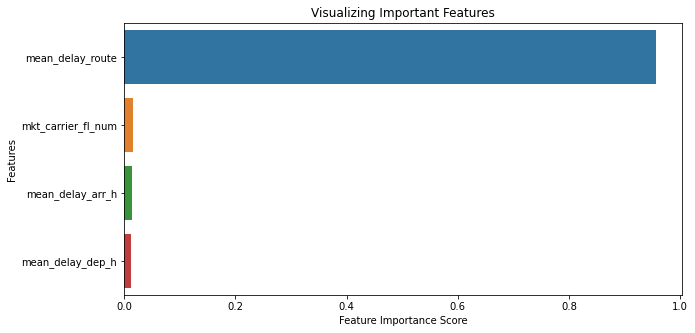

In [179]:
# Feature analysis for importance
cols = ['mean_delay_route', 'mean_delay_dep_h', 'mean_delay_arr_h', 'mkt_carrier_fl_num']

feature_imp = pd.Series(best_model_rf.feature_importances_,index=cols).sort_values(ascending=False)

# Plot feature importance
fig, ax = plt.subplots(figsize=(10,5))
# Create a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels 
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

### XGBRegressor

In [98]:
# define hyperparamters
params = {'objective': ['reg:linear'], 'learning_rate': [0.002], 'max_depth': [3], \
         'colsample_bytree': [0.7], 'alpha': [0.005], 'n_estimators': [6000]}

#Create an instance of the model
xgb = xgb.XGBRegressor()
k_folds = 5

# perform cross validation and grid search
xgb_grid = GridSearchCV(estimator=xgb, param_grid=params, cv=k_folds, scoring='r2', n_jobs=-1) 
xgb_grid_result = xgb_grid.fit(X_train, y_train)

# Check best hyperparameters and train the best model
best_n_estimators = xgb_grid_result.best_params_['n_estimators']
best_max_depth = xgb_grid_result.best_params_['max_depth']
best_learning_rate = xgb_grid_result.best_params_['learning_rate']
best_alpha = xgb_grid_result.best_params_['alpha']
best_model_xgb = xgb_grid_result.best_estimator_

# Predict results
y_pred_xgb = best_model_xgb.predict(X_test)

# Calculate metrics
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
MAE = mean_absolute_error(y_test, y_pred_xgb)

# Check training and test accuracy
xgb_training_accuracy = best_model_xgb.score(X_train, y_train)
xgb_test_accuracy = best_model_xgb.score(X_test, y_test)

# Print results
print('XGBRegressor')
print('============')
print(f'Best number of Trees: {best_n_estimators}\nBest max depth:\t{best_max_depth}')
print(f'Best learning rate: {best_learning_rate}\nBest alpha:\t{best_alpha}')
print(f'R^2 :{r2_xgb:.4f}')
print(f'RMSE:  {rmse_xgb:.4f}')
print(f'MAE: {MAE:.4f}')
print(f'Training accuracy: {xgb_training_accuracy:.4f},    Test accuracy: {xgb_test_accuracy:.4f}')

[11:46:21] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor
Best number of Trees: 6000
Best max depth:	3
Best learning rate: 0.002
Best alpha:	0.005
R^2 :0.3717
RMSE:  11.9462
Training accuracy: 0.4565,    Test accuracy: 0.3717


In [139]:
filename = 'xgb_model.sav'
pickle.dump(best_model_xgb, open(filename, 'wb'))

### Round 1 results:

Data variables = ['year', 'month', 'day', 'dayofweek', 'mkt_unique_carrier', 'mkt_carrier_fl_num', 'origin', \
                  'dest', 'crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'distance', 'arr_delay']


**Linear Regression**
Cross-validated R^2
Mean: 0.0115
Std.: 0.0043
R^2: 0.0077
RMSE: 54.8165
Training accuracy: 0.0164
Test accuracy: 0.0077

**Linear Regression with Polynomial Degree = 2**
Number of polynomial features: 91
R^2: 0.0072
RMSE: 54.8285
Training accuracy: 0.0298
Test accuracy: 0.0072

**Linear Regression with Polynomial Degree = 3**
Number of polynomial features: 455
R^2: -0.0340
RMSE: 55.9557
Training accuracy: 0.0864
Test accuracy: -0.0340

**Ridge Regression**
The best hyperparameter settings achieve a cross-validated R^2 of: 0.0116
Alpha:	10
R^2: 0.0077
RMSE:  54.8156
Training accuracy: 0.0164,    Test accuracy: 0.0077

**Ridge Regresssion on Polynomial (Degree = 3) with grid search**
The best hyperparameter settings achieve a cross-validated R^2 of: 0.0035
Alpha:	80000
R^2 :0.0138
RMSE:  14.9820
Training accuracy: 0.0198,    Test accuracy: 0.0138

**Random Forest Regressor**
Best number of Trees: 5000
Best max depth:	1
R^2 :0.0081
RMSE:  54.8048
Training accuracy: 0.0154,    Test accuracy: 0.0081

**XGBRegressor**
Best number of Trees: 250
Best max depth:	1
Best learning rate: 0.05
Best alpha:	0.1
R^2 :0.0157
RMSE:  48.9381
Training accuracy: 0.0270,    Test accuracy: 0.0157


### Round 2 results:
Got rid of outliers in arr_delay (anything below Q1 - 1.5*IQR or anything above Q3 + 1.5*IQR)

Data variables = ['year', 'month', 'day', 'dayofweek', 'mkt_unique_carrier', 'mkt_carrier_fl_num', 'origin', \
                  'dest', 'crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'distance', 'arr_delay']

**Not finely tuning the hyperparameters at this stage because error is too high and don't want to waste time running models that don't yet work well**

**Linear Regression**
Cross-validated R^2
Mean: 0.0097
Std.: 0.0088
R^2: 0.0249
RMSE: 14.8973
Training accuracy: 0.0164
Test accuracy: 0.0249

**Linear Regression with Polynomial Degree = 2**
Number of polynomial features: 91
R^2: 0.0203
RMSE: 14.9324
Training accuracy: 0.0408
Test accuracy: 0.0203

**Linear Regression with Polynomial Degree = 3**
Number of polynomial features: 1330
R^2: -0.3845
RMSE: 17.9772
Training accuracy: 0.2970
Test accuracy: -0.3845

**Ridge Regression**
The best hyperparameter settings achieve a cross-validated R^2 of: 0.0097
Alpha:	1
R^2: 0.0249
RMSE:  14.8976
Training accuracy: 0.0164,    Test accuracy: 0.0249

**Ridge Regresssion on Polynomial (Degree = 3) with grid search**
The best hyperparameter settings achieve a cross-validated R^2 of: 0.0146
Alpha:	50000
R^2 :0.0160
RMSE:  24.5943
Training accuracy: 0.0330,    Test accuracy: 0.0160

**Random Forest Regressor**   
Best number of Trees: 500
Best max depth:	7
R^2 :0.0229
RMSE:  14.9129
Training accuracy: 0.1321,    Test accuracy: 0.0229

**XGBRegressor**
Best number of Trees: 500
Best max depth:	3
Best learning rate: 0.01
Best alpha:	0.1
R^2 :0.0235
RMSE:  14.9079
Training accuracy: 0.0715,    Test accuracy: 0.0235


### Round 3 results:
Got rid of outliers in arr_delay (anything below Q1 - 1.5*IQR or anything above Q3 + 1.5*IQR)

Feature engineering delay variables based on statistical summaries of historical data

Data variables = ['year', 'month', 'day', 'dayofweek', 'mkt_unique_carrier',
       'mkt_carrier_fl_num', 'origin', 'dest', 'dep_h', 'arr_h',
       'crs_elapsed_time', 'distance', 'arr_delay', 'mean_delay_carrier',
       'mean_delay_origin', 'mean_delay_dest', 'mean_delay_month',
       'mean_delay_dep_h', 'mean_delay_arr_h']

**Not finely tuning the hyperparameters at this stage because error is too high and don't want to waste time running models that don't yet work well**

**Linear Regression**
Cross-validated R^2
Mean: 0.0886
Std.: 0.0085
R^2: 0.0914
RMSE: 14.5629
Training accuracy: 0.0940
Test accuracy: 0.0914

**Linear Regression with Polynomial Degree = 2**
Number of polynomial features: 190
R^2: 0.0678
RMSE: 14.7513
Training accuracy: 0.1289
Test accuracy: 0.0678

**Linear Regression with Polynomial Degree = 3**
Number of polynomial features: 455
R^2: -0.0450
RMSE: 15.4217
Training accuracy: 0.1039
Test accuracy: -0.0450

**Ridge Regression**
The best hyperparameter settings achieve a cross-validated R^2 of: 0.0887
Alpha:	10
R^2: 0.0912
RMSE:  14.5650
Training accuracy: 0.0940,    Test accuracy: 0.0912

**Ridge Regresssion on Polynomial (Degree = 3) with grid search**
The best hyperparameter settings achieve a cross-validated R^2 of: 0.0707
Alpha:	50000
R^2 :0.0758
RMSE:  14.6879
Training accuracy: 0.1152,    Test accuracy: 0.0758

**Random Forest Regressor**   
Best number of Trees: 5000
Best max depth:	7
R^2 :0.0769
RMSE:  14.6792
Training accuracy: 0.2020,    Test accuracy: 0.0769

**XGBRegressor**
Best number of Trees: 500
Best max depth:	1
Best learning rate: 0.05
Best alpha:	1
R^2 :0.0742
RMSE:  14.7001
Training accuracy: 0.1031,    Test accuracy: 0.0742


### Round 4 results:
Got rid of outliers in arr_delay (anything below Q1 - 1.5*IQR or anything above Q3 + 1.5*IQR)

More feature engineering - added mean_delay for day of the week and mean delay for the route

Data variables = ['year', 'month', 'day', 'dayofweek', 'mkt_unique_carrier',
       'mkt_carrier_fl_num', 'origin', 'dest', 'dep_h', 'arr_h',
       'crs_elapsed_time', 'distance', 'arr_delay', 'mean_delay_carrier',
       'mean_delay_origin', 'mean_delay_dest', 'mean_delay_month',
       'mean_delay_dep_h', 'mean_delay_arr_h', 'mean_delay_day_of_week',
       'mean_delay_route']

**Not finely tuning the hyperparameters at this stage because error is too high and don't want to waste time running models that don't yet work well**

**Linear Regression**
Cross-validated R^2
Mean: 0.4089
Std.: 0.0225
R^2: 0.3926
RMSE: 11.7461
Training accuracy: 0.4139
Test accuracy: 0.3926

**Linear Regression with Polynomial Degree = 2**
Number of polynomial features: 231
R^2: 0.3756
RMSE: 11.9093
Training accuracy: 0.4353
Test accuracy: 0.3756

**Linear Regression with Polynomial Degree = 3**
Number of polynomial features: 1771
R^2: -0.2145
RMSE: 16.6089
Training accuracy: 0.5757
Test accuracy: -0.2145

**Ridge Regression**
The best hyperparameter settings achieve a cross-validated R^2 of: 0.4089
Alpha:	5
R^2: 0.3926
RMSE:  11.7461
Training accuracy: 0.4139,    Test accuracy: 0.3926

**Ridge Regresssion on Polynomial (Degree = 2) with grid search**
The best hyperparameter settings achieve a cross-validated R^2 of: 0.3709
Alpha:	1500
R^2 :0.3738
RMSE:  11.9259
Training accuracy: 0.4101,    Test accuracy: 0.3738

**Ridge Regresssion on Polynomial (Degree = 3) with grid search**
The best hyperparameter settings achieve a cross-validated R^2 of: 0.3351
Alpha:	50000
R^2 :0.3435
RMSE:  12.2115
Training accuracy: 0.3820,    Test accuracy: 0.3435

**Random Forest Regressor**   
Best number of Trees: 5000
Best max depth:	5
R^2 :0.3774
RMSE:  11.8914
Training accuracy: 0.4325,    Test accuracy: 0.3774

**XGBRegressor**
Best number of Trees: 6000
Best max depth:	3
Best learning rate: 0.002
Best alpha:	0.005
R^2 :0.3717
RMSE:  11.9462
Training accuracy: 0.4565,    Test accuracy: 0.3717


### Round 5 results:
Got rid of outliers in arr_delay (anything below Q1 - 1.5*IQR or anything above Q3 + 1.5*IQR)

More feature engineering - added mean_delay for taxi_out, taxi_in and flights per departure hour

Increased training dataset from 10K rows to 100K rows

Data variables = ['year', 'month', 'day', 'dayofweek', 'mkt_unique_carrier',
       'mkt_carrier_fl_num', 'origin', 'dest', 'dep_h', 'arr_h',
       'crs_elapsed_time', 'distance', 'arr_delay', 'mean_delay_carrier',
       'mean_delay_origin', 'mean_delay_dest', 'mean_delay_month',
       'mean_delay_dep_h', 'mean_delay_arr_h', 'mean_delay_day_of_week',
       'mean_delay_route', 'mean_taxi_out_per_dep_h', 'mean_taxi_in_per_arr_h',
       'num_flights_per_dep_h']
       
**Linear Regression**
Cross-validated R^2
Mean: 0.1106
Std.: 0.0049
R^2: 0.1018
RMSE: 14.5422
Training accuracy: 0.1113
Test accuracy: 0.1018

**Linear Regression with Polynomial Degree = 2**
Number of polynomial features: 300
R^2: 0.1055
RMSE: 14.5126
Training accuracy: 0.1236
Test accuracy: 0.1055

**Linear Regression with Polynomial Degree = 3**
- did not run (too much data) ---> computer froze

**Ridge Regression**
The best hyperparameter settings achieve a cross-validated R^2 of: 0.1106
Alpha:	5
R^2: 0.1018
RMSE:  14.5422
Training accuracy: 0.1113,    Test accuracy: 0.1018

**Ridge Regresssion on Polynomial (Degree = 2) with grid search**
The best hyperparameter settings achieve a cross-validated R^2 of: 0.1126
Alpha:	40
R^2 :0.1056
RMSE:  14.5120
Training accuracy: 0.1235,    Test accuracy: 0.1056

**Ridge Regresssion on Polynomial (Degree = 3) with grid search**
- did not run (too much data)

**Random Forest Regressor**   
- did not run (too much data)

**XGBRegressor**
- did not run (too much data)


### Final results:
Sample data to get balanced representation of positive and negative delays. Everything else same as above
~100K samples

Data variables = ['year', 'month', 'day', 'dayofweek', 'mkt_unique_carrier',
       'mkt_carrier_fl_num', 'origin', 'dest', 'dep_h', 'arr_h',
       'crs_elapsed_time', 'distance', 'arr_delay', 'mean_delay_carrier',
       'mean_delay_origin', 'mean_delay_dest', 'mean_delay_month',
       'mean_delay_dep_h', 'mean_delay_arr_h', 'mean_delay_day_of_week',
       'mean_delay_route', 'mean_taxi_out_per_dep_h', 'mean_taxi_in_per_arr_h',
       'num_flights_per_dep_h']
       
**Linear Regression**
Cross-validated R^2
Mean: 0.1050
Std.: 0.0040
R^2: 0.1026
RMSE: 19.3516
MAE: 15.0416
Training accuracy: 0.1057
Test accuracy: 0.1026

**Linear Regression with Polynomial Degree = 2**
Number of polynomial features: 300
R^2: 0.1065
RMSE: 19.3099
MAE: 15.0025
Training accuracy: 0.1170
Test accuracy: 0.1065

**Linear Regression with Polynomial Degree = 3**
- did not run 

**Ridge Regression**
The best hyperparameter settings achieve a cross-validated R^2 of: 0.1050
Alpha:	10
R^2: 0.1026
RMSE:  19.3515
MAE: 15.0415
Training accuracy: 0.1057,    Test accuracy: 0.1026

**Ridge Regresssion on Polynomial (Degree = 2) with grid search**
The best hyperparameter settings achieve a cross-validated R^2 of: 0.1073
Alpha:	110
R^2 :0.1068
RMSE:  19.3061
MAE: 14.9962
Training accuracy: 0.1168,    Test accuracy: 0.1068

**Ridge Regresssion on Polynomial (Degree = 3) with grid search**
- did not run

**Random Forest Regressor**   
- did not run (too much data)

**XGBRegressor**
- did not run (too much data)